# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [27]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [28]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())      
print('Male Weight mean:', male_df.Weight.mean())
print('Male Weight sd:' ,male_df.Weight.std())   

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:' ,female_df.Height.std())      
print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:' ,female_df.Weight.std())   

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660651
Male Weight mean: 187.0206206581932
Male Weight sd: 19.781154516763813
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765055
Female Weight mean: 135.86009300746835
Female Weight sd: 19.02246780531901


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

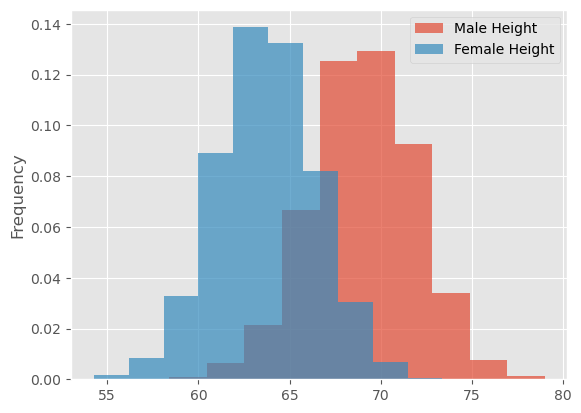

In [43]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ='Male Height');
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
plt.show()

In [30]:
# Record your observations - are these inline with your personal observations?
"""Both male and female heights seem to be normally distributed; 
however, male heights have more spread, shown by the peak being shorter than that of the female heights. 
Overall, it seems there's overlap from 60 inches to 72 inches with the most common region between 65 and 68 inches.
Male heights tend to be higher than female heights overall.
"""

"Both male and female heights seem to be normally distributed; \nhowever, male heights have more spread, shown by the peak being shorter than that of the female heights. \nOverall, it seems there's overlap from 60 inches to 72 inches with the most common region between 65 and 68 inches.\nMale heights tend to be higher than female heights overall.\n"

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

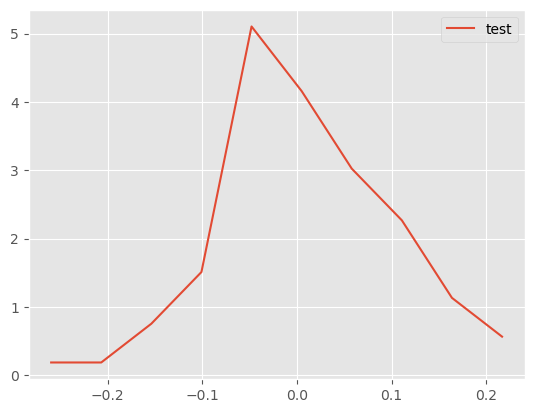

In [31]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add Overlapping density plots to the histograms plotted earlier

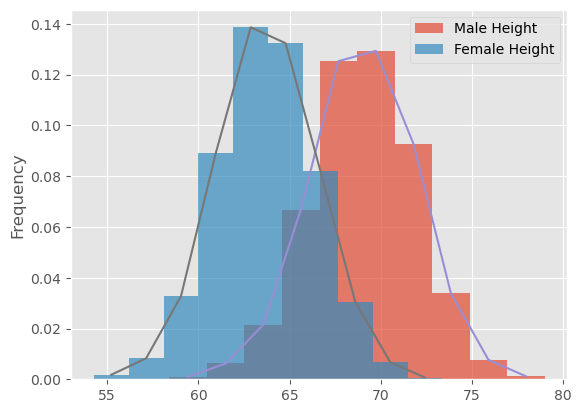

In [45]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ='Male Height');
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat above exerice for male and female weights

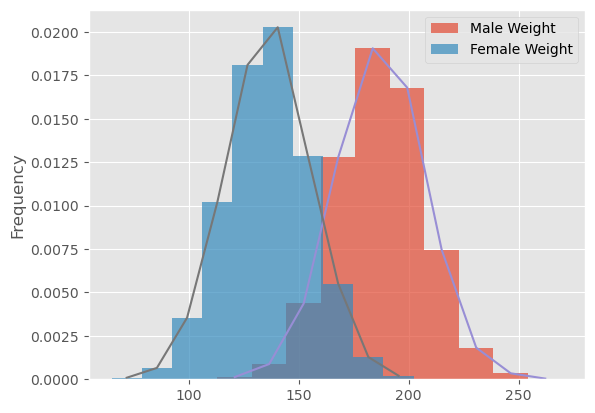

In [46]:
binsize = 10
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ='Male Weight');
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [34]:
# Record your observations - are these inline with your personal observations?
'''
Male weights are distributed higher than female weights just like height. The overlap seems to be from 125 - 200 lbs, with the most common area around 160.
again, the males have more variability, which we see with the lower peak compared to female weights.
'''
# What is the takeaway when comparing male and female heights and weights?
"""
Weight makes it easier to distinguish between male and females than height does.
"""

## Repeat Above experiments in seaborn and compare with your results

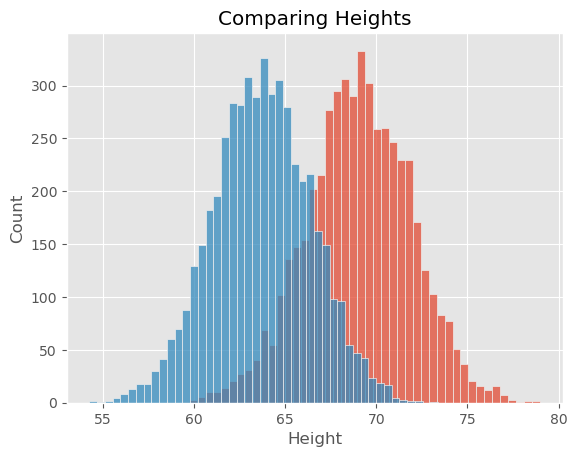

In [49]:
# Code for heights here
import seaborn as sns
sns.histplot(male_df.Height)
sns.histplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

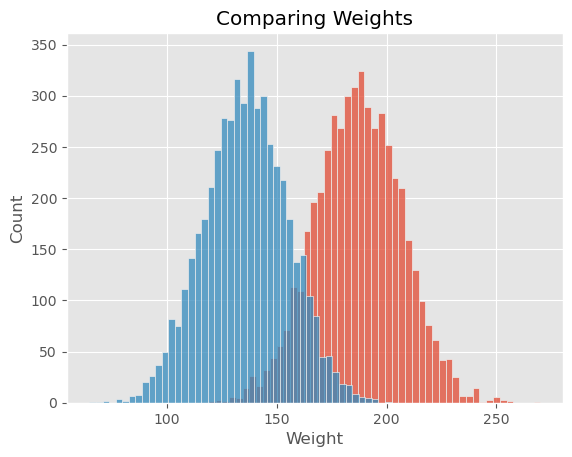

In [50]:
# Code for weights here
# Code for heights here
import seaborn as sns
sns.histplot(male_df.Weight)
sns.histplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [51]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
"""
Seaborn is a bit easier to manage, in my opinion. We don't have to worry about coding the alpha level or the density or even the bin sizes.
However, the auto bin sizes in Seaborn can give too much information and can make it harder to discern the differences in the overlap area.
"""

"\nSeaborn is a bit easier to manage, in my opinion. We don't have to worry about coding the alpha level or the density or even the bin sizes.\nHowever, the auto bin sizes in Seaborn can give too much information and can make it harder to discern the differences in the overlap area.\n"

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.